# Image Smoothing

### Image Enhancement
Image enhancement is the process of improving the visual quality or interpretability of a digital image. The goal is to highlight important features, suppress noise, and make the image more suitable for analysis by humans or computer vision systems. Enhancement techniques can be broadly classified into:

* Point operations (intensity transformations) : manipulate individual pixel values.
* Spatial filtering : operate on a neighborhood of pixels to smooth or sharpen images.

### Smoothing (Blurring) Filters
Smoothing filters are used to reduce noise and minor intensity variations in an image. These filters operate by averaging or computing the median of neighboring pixel values.

Common Smoothing Filters:

1. Mean Filter: Replaces each pixel with the average of its neighbors. Simple but may blur edges.
2. Median Filter: Replaces each pixel with the median of its neighbors. More effective at removing salt-and-pepper noise without blurring edges significantly.

Effect: Produces a smoother, less noisy image, but fine details may be slightly blurred.

### Sharpening Filters
Sharpening filters are used to highlight edges and fine details in an image. They enhance regions where intensity changes rapidly.

Common Sharpening Filters:

1. Laplacian Filter: Highlights regions of rapid intensity change using second-order derivatives.
2. High-Pass Filter: Emphasizes high-frequency components, making edges and textures more prominent.

Effect: Enhances the visual perception of details, edges, and textures. Care must be taken, as sharpening can also amplify noise if present in the image.

### Importance of Smoothing and Sharpening in Image Enhancement
* Smoothing helps in noise reduction and prepares the image for further processing.

* Sharpening improves edge visibility and makes features more distinguishable.

* Both techniques are often combined in preprocessing pipelines to improve image quality for human observation or computer vision tasks.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
def apply_kernel(img, kernel):
    """
    Apply 2d conv kernel to an image (grayscale or RGB) from scratch
    Args:
    img: 2d or 3d numpy array
    kernel: 2d numpy array
    """
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Add padding
    if img.ndim == 2: # Grayscale
        img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode="reflect")
    else: # RGB
        img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode="reflect")

    # Output image
    out = np.zeros_like(img, dtype=np.float32)

    # Iterate over each pixel
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if img.ndim == 2: # Grayscale
                window = img_padded[i:i+k_h, j:j+k_w]
                out[i,j] = np.sum(window * kernel)
            else: # RGB
                for c in range(img.shape[2]):
                    window = img_padded[i:i+k_h, j:j+k_w, c]
                    out[i,j,c] = np.sum(window * kernel)

    # Clip values to [0,255]
    return np.uint8(np.clip(out, 0, 255))

In [5]:
# Defining Averaging Kernel
avg_kernel = np.ones((9,9), dtype=np.float32)/81

In [6]:
#Defining 5x5 Gaussian like kernel
kernel_5x5 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 34, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
], dtype=np.float32)

kernel_5x5 /= np.sum(kernel_5x5)#Normalize to sum=1

In [7]:
kernel_7x7 = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 2, 4, 4, 4, 2, 1],
    [2, 4, 8, 8, 8, 4, 2],
    [2, 4, 8, 16,8, 4, 2],
    [2, 4, 8, 8, 8, 4, 2],
    [1, 2, 4, 4, 4, 2, 1],
    [1, 1, 2, 2, 2, 1, 1],
],  dtype=np.float32)

kernel_7x7 /= np.sum(kernel_7x7)

In [9]:
img = cv2.imread('IPimg3.jpg')
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
smoothed_img1 = apply_kernel(img_rgb, avg_kernel)
smoothed_img2 = apply_kernel(img_rgb, kernel_5x5)
smoothed_img3 = apply_kernel(img_rgb, kernel_7x7)

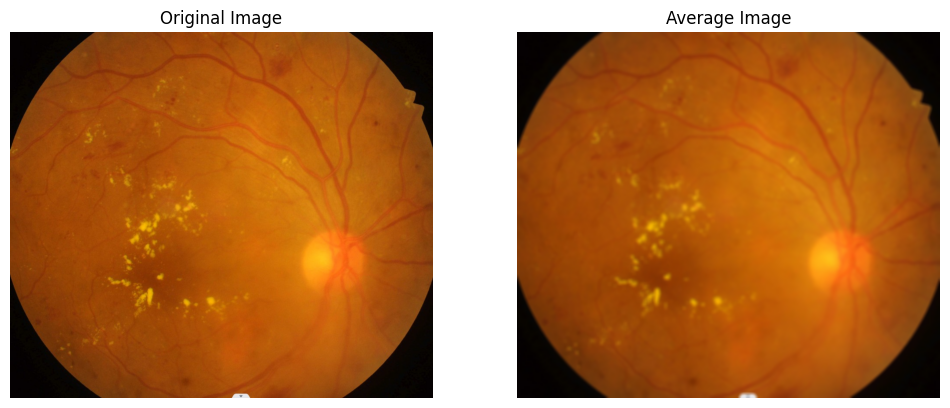

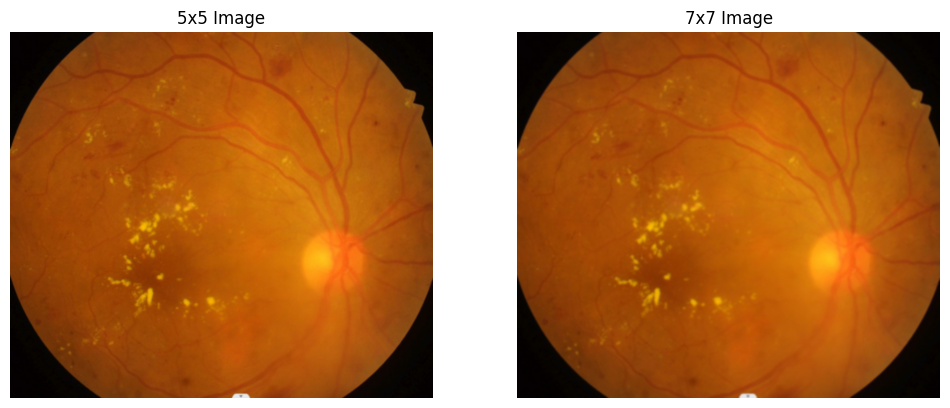

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")


plt.subplot(1,2,2)
plt.title("Average Image")
plt.imshow(smoothed_img1)
plt.axis("off")

plt.show()

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("5x5 Image")
plt.imshow(smoothed_img2)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("7x7 Image")
plt.imshow(smoothed_img3)
plt.axis("off")

plt.show()

In [12]:
#Convolution function

def apply_kernel(img, kernel):
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # pad image
    if img.ndim == 2: # Grayscale
        img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode="reflect")
    else: # RGB
        img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode="reflect")

    # Output image
    out = np.zeros_like(img, dtype=np.float32)

    # Iterate over each pixel
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if img.ndim == 2: # Grayscale
                window = img_padded[i:i+k_h, j:j+k_w]
                out[i,j] = np.sum(window * kernel)
            else: # RGB
                for c in range(img.shape[2]):
                    window = img_padded[i:i+k_h, j:j+k_w, c]
                    out[i,j,c] = np.sum(window * kernel)

    return out

In [13]:
# define laplacian kernel type 1
laplacian_kernel1 = np.array([
    [0,-1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

In [14]:
#define laplaian kernel type 2
laplacian_kernel2 = np.array([
    [-1,-1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=np.float32)

In [15]:
#define laplaian kernel type 3
laplacian_kernel3 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
], dtype=np.float32)